# Business Understanding

IT develops more an more different programming languages for a lot of different use cases. Using my data analytics skills, I want to know more about that topic. There for, I will use the data of Stack Overflow's developer survey data from 2017, to answer the following questions.

1. Having a lot of IT developed in the US, what are the most commonly known languages used by professionals?
2. Are there any correlations of the knowlede of programming languages, e.g. do most people, who knows C, know JavaScript as well?


# Data Understanding

As already mentioned, the analysis is based on Stack Overflow's developer survey data from 2017. In this survey, respondents from about 200 countries gave their answers to about 150 survey questions.

## Date Gathering and basic understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
raw_data = pd.read_csv('data\survey_results_public.csv')

In [3]:
raw_data.shape

(51392, 154)

Total responses of the survey is 51392 answering 154 questions.

In [4]:
raw_data.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [5]:
raw_data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


General view analysis helps to get an flexible insight into different rows.

In [6]:
useCases =  ['Country','YearsProgram','ProblemSolving','LearningNewTech' ]

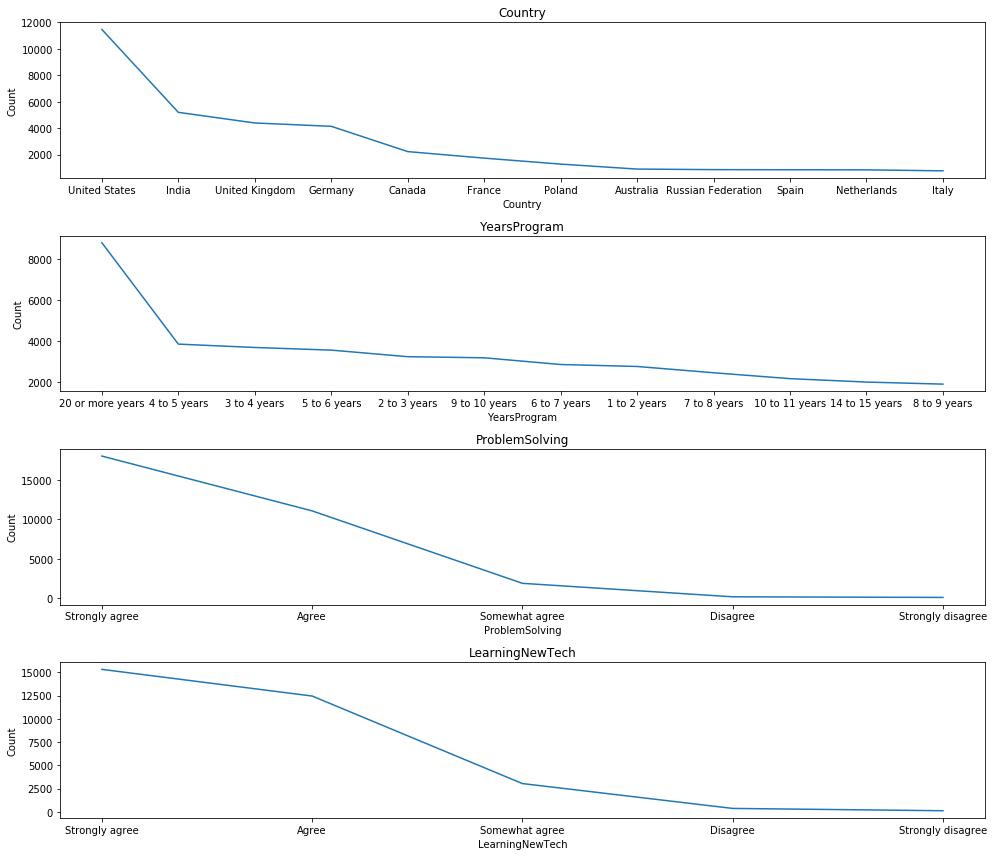

In [7]:
cols =1
rows = len(useCases) //cols
fig, axs = plt.subplots(rows, cols, figsize=(14, 12),)

for ax, case in zip(axs.flat, useCases):
    ax.plot(raw_data[case].value_counts()[:12])
    ax.set_title(case)
    ax.set_xlabel(case)
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

Text(0.5,0,'Percent Missing Vals')

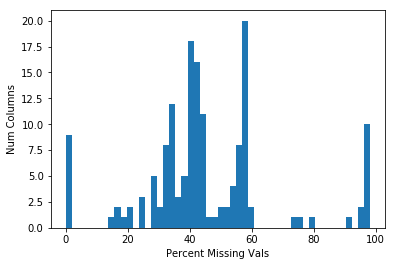

In [8]:
percent_na_column = (raw_data.isnull().sum()/raw_data.shape[0])*100
plt.hist(percent_na_column, bins=50)
plt.ylabel('Num Columns')
plt.xlabel('Percent Missing Vals')

In [9]:
percent_na_column

Respondent                      0.000000
Professional                    0.000000
ProgramHobby                    0.000000
Country                         0.000000
University                      0.000000
EmploymentStatus                0.000000
FormalEducation                 0.000000
MajorUndergrad                 16.638776
HomeRemote                     14.367995
CompanySize                    24.264477
CompanyType                    24.457114
YearsProgram                    0.480620
YearsCodedJob                  20.435087
YearsCodedJobPast              98.104763
DeveloperType                  29.706958
WebDeveloperType               79.187422
MobileDeveloperType            96.978129
NonDeveloperType               90.484900
CareerSatisfaction             16.922867
JobSatisfaction                21.435243
ExCoderReturn                  98.204001
ExCoderNotForMe                98.207892
ExCoderBalance                 98.204001
ExCoder10Years                 98.215676
ExCoderBelonged 

## Answering question 1 

Having a lot of IT developed in the US, what are the most commonly known languages used by professionals?


#### Country Analytics

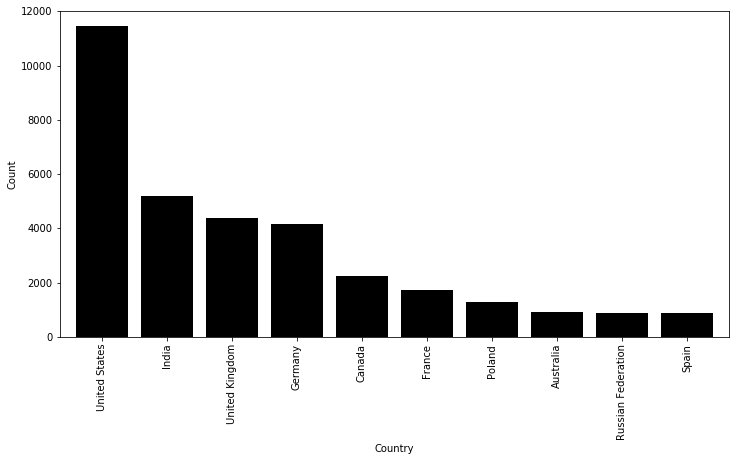

In [10]:
plt.subplots(figsize=(12,6))
ax=raw_data['Country'].value_counts()[:10].plot.bar(width=0.8,color='#000000')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

Most of the participants are from the US.

#### Professions Analytics

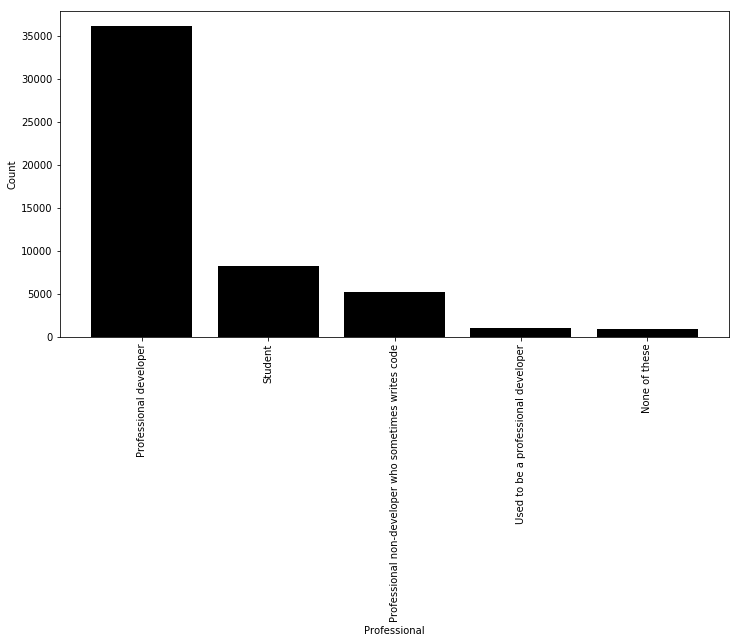

In [11]:
plt.subplots(figsize=(12,6))
ax=raw_data['Professional'].value_counts()[:10].plot.bar(width=0.8,color='#000000')
plt.xlabel('Professional')
plt.ylabel('Count')
plt.show()

Most participants are professional developers and are sill acitve

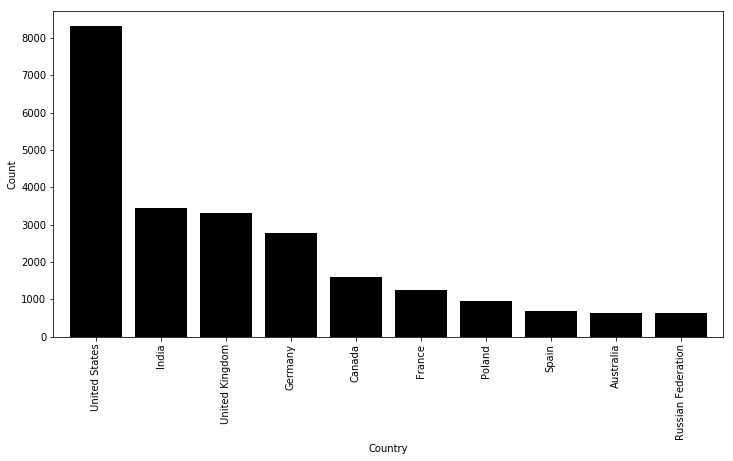

In [12]:
plt.subplots(figsize=(12,6))
professionals = raw_data[raw_data['Professional']=='Professional developer']
ax=professionals['Country'].value_counts()[:10].plot.bar(width=0.8,color='#000000')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

The distribution of the Professional developers looks like the overall survey distribution. What kind of programming language is most commonly known?

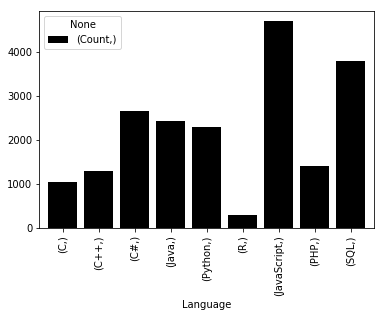

In [13]:
professionals = raw_data[raw_data['Professional']=='Professional developer']
professionals_US = professionals[professionals['Country'] == "United States"]
languages = ['C','C++','C#','Java','Python','R','JavaScript','PHP','SQL']
result_US={}
for i in languages:
    result_US[i]=(professionals_US['HaveWorkedLanguage'].apply(lambda x: i in str(x).split('; ')).value_counts()[1])
lang_count=pd.DataFrame(list(result_US.items()))
lang_count.columns=[['Language','Count']]
lang_count.set_index('Language',inplace=True)    
lang_count.plot.bar(width=0.8,color='#000000')
plt.show()

#### Conclusion 1
It looks like JavaScript and SQL ist most commony known by US based professional developers. In addition, it looks like very basic languages close to HW programming  like C & C++ are not that commonly knwon. Furthermore, R - an data analytics language, looks like it is really only known by experts.

## Question 2
Are there any correlations of the knowlede of programming languages, e.g. do most people, who knows C, know JavaScript as well?

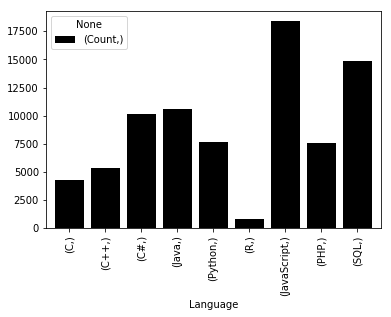

In [58]:
result={}
for i in languages:
    result[i]=(professionals['HaveWorkedLanguage'].apply(lambda x: i in str(x).split('; ')).value_counts()[1])
lang_count=pd.DataFrame(list(result.items()))
lang_count.columns=[['Language','Count']]
lang_count.set_index('Language',inplace=True)    
lang_count.plot.bar(width=0.8,color='#000000')
plt.show()

In [59]:
for i in languages:
    result[i]=(professionals['HaveWorkedLanguage'].apply(lambda x: i in str(x).split('; ')))

Convert to dataframe

In [60]:
df = pd.DataFrame.from_dict(result)
df.head()


,C,C++,C#,Java,Python,R,JavaScript,PHP,SQL
2,False,False,False,True,True,False,False,True,False
4,False,False,False,False,False,False,False,False,False
7,False,False,False,False,True,False,True,False,False
8,False,False,True,False,False,False,True,False,False
9,False,False,False,False,False,False,False,False,False


In [61]:
df.describe()

,C,C++,C#,Java,Python,R,JavaScript,PHP,SQL
count,36131,36131,36131,36131,36131,36131,36131,36131,36131
unique,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,True,False,False
freq,31869,30805,26002,25545,28518,35286,18421,28608,21295


In [62]:
le = preprocessing.LabelEncoder()
for x in df.columns:
    if df[x].dtypes=='object':
       df[x]=le.fit_transform(df[x])
corr = df.corr()

In [63]:
corr

,C,C++,C#,Java,Python,R,JavaScript,PHP,SQL
C,1.000000,0.522492,0.062694,0.147857,0.243220,0.083076,0.033481,0.070918,0.054933
C++,0.522492,1.000000,0.124433,0.147268,0.246724,0.070999,0.023050,0.050579,0.049522
C#,0.062694,0.124433,1.000000,0.003562,-0.017865,0.029402,0.255378,0.000303,0.340802
Java,0.147857,0.147268,0.003562,1.000000,0.163054,0.059320,0.205440,0.089089,0.205594
Python,0.243220,0.246724,-0.017865,0.163054,1.000000,0.161644,0.151726,0.088232,0.127193
R,0.083076,0.070999,0.029402,0.059320,0.161644,1.000000,0.043296,0.024382,0.081909
JavaScript,0.033481,0.023050,0.255378,0.205440,0.151726,0.043296,1.000000,0.363727,0.446234
PHP,0.070918,0.050579,0.000303,0.089089,0.088232,0.024382,0.363727,1.000000,0.322285
SQL,0.054933,0.049522,0.340802,0.205594,0.127193,0.081909,0.446234,0.322285,1.000000


<Figure size 1296x1296 with 0 Axes>

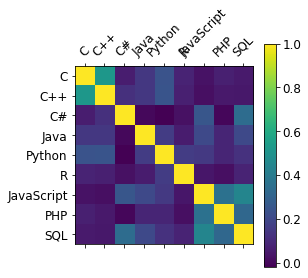

In [64]:
plt.figure(figsize=(18, 18))
plt.matshow(corr)
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=12, rotation=45)
plt.yticks(range(corr.shape[1]), corr.columns, fontsize=12)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)

#### Conclusion 2

The correlation matrix already gives the answer, if and yes where developers have clusters of skills. The basic results are:
- In general, there are no big correlations. This means, that there are no big cluster of "if a developfer knows language 1, then he knows language 2"
- There are only 2 meaningful correlations between
    - C and C++, having around 50 % of the people knowing both of the languages and
    - in terms of the often in web development used languages JavaScript, PHP and SQL. Anyway, they just overlap by about 30 %.
    


## Question 3
How the correlation distribution of programming languages differ in Germany in contrast to the overall survey results?

In [69]:
professionals_lan = professionals.join(df)
professionals_lan_ger = professionals_lan[professionals_lan["Country"]=="Germany"]
professionals_lan_ger_subeset=professionals_lan_ger[languages]

In [74]:

le_ger = preprocessing.LabelEncoder()
for x in professionals_lan_ger_subeset.columns:
    if professionals_lan_ger_subeset[x].dtypes=='object':
       professionals_lan_ger_subeset[x]=le_ger.fit_transform(professionals_lan_ger[x])
corr_ger = professionals_lan_ger_subeset.corr()

In [75]:
corr_ger

,C,C++,C#,Java,Python,R,JavaScript,PHP,SQL
C,1.000000,0.528659,0.110206,0.119500,0.230659,0.040453,0.000272,0.045893,0.070811
C++,0.528659,1.000000,0.172478,0.109120,0.279006,0.035519,-0.008573,0.028784,0.065290
C#,0.110206,0.172478,1.000000,0.035364,-0.012507,-0.000875,0.134262,0.074905,0.279816
Java,0.119500,0.109120,0.035364,1.000000,0.113232,0.060474,0.266086,0.105840,0.262307
Python,0.230659,0.279006,-0.012507,0.113232,1.000000,0.091518,0.158964,0.067815,0.120353
R,0.040453,0.035519,-0.000875,0.060474,0.091518,1.000000,0.037518,0.035023,0.052501
JavaScript,0.000272,-0.008573,0.134262,0.266086,0.158964,0.037518,1.000000,0.433516,0.386998
PHP,0.045893,0.028784,0.074905,0.105840,0.067815,0.035023,0.433516,1.000000,0.357361
SQL,0.070811,0.065290,0.279816,0.262307,0.120353,0.052501,0.386998,0.357361,1.000000


In [76]:
corr_dif = abs(corr_ger-corr)

In [77]:
corr_dif

,C,C++,C#,Java,Python,R,JavaScript,PHP,SQL
C,0.000000,0.006167,0.047512,0.028356,0.012561,0.042623,0.033209,0.025026,0.015878
C++,0.006167,0.000000,0.048045,0.038148,0.032282,0.035480,0.031623,0.021794,0.015767
C#,0.047512,0.048045,0.000000,0.031802,0.005358,0.030276,0.121116,0.074603,0.060986
Java,0.028356,0.038148,0.031802,0.000000,0.049822,0.001154,0.060647,0.016751,0.056713
Python,0.012561,0.032282,0.005358,0.049822,0.000000,0.070126,0.007237,0.020417,0.006840
R,0.042623,0.035480,0.030276,0.001154,0.070126,0.000000,0.005778,0.010641,0.029408
JavaScript,0.033209,0.031623,0.121116,0.060647,0.007237,0.005778,0.000000,0.069789,0.059236
PHP,0.025026,0.021794,0.074603,0.016751,0.020417,0.010641,0.069789,0.000000,0.035076
SQL,0.015878,0.015767,0.060986,0.056713,0.006840,0.029408,0.059236,0.035076,0.000000


<Figure size 1296x1296 with 0 Axes>

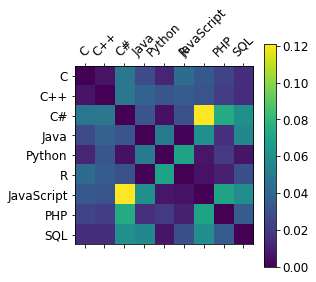

In [78]:
plt.figure(figsize=(18, 18))
plt.matshow(corr_dif)
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=12, rotation=45)
plt.yticks(range(corr.shape[1]), corr.columns, fontsize=12)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)

#### Conclusion 3

One the first look, the correlation of developing languages know-how differs not much in Germany to the rest of the world. But, having a deeper, more specific look into the differences
